# World Happiness Report (2015-2019) EDA

For this project I used World Happiness Report datasets from 2015 to 2019 downloaded from Kaggle. 

Insights explored in the analysis:

    1. Score variance across years. How does happiness score vary from 2015 to 2019?
    2. Which variables best explain the score?
    3. Which countries fall or rise the most in the rankings over the years?
    4. Which countries are consistently the happiest?
    5. Variables correlations.


Dataset link: https://www.kaggle.com/datasets/unsdsn/world-happiness

In [6]:
# Import of libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Datasets Preparation

new_order = ["Rank","Country","Score","GDP per Capita","Life Expectancy","Freedom","Perceptions of corruption","Generosity","Year"]

df15 = pd.read_csv("./CSV/2015.csv")
df15 = df15.drop(columns=["Region","Family","Standard Error","Dystopia Residual"])
df15.rename(columns = {"Happiness Rank":"Rank",
                       "Happiness Score":"Score",
                       "Economy (GDP per Capita)":"GDP per Capita",
                       "Health (Life Expectancy)":"Life Expectancy",
                       "Trust (Government Corruption)":"Perceptions of corruption"}, inplace=True)
df15["Year"] = 2015
df15 = df15[new_order]

df16 = pd.read_csv("./CSV/2016.csv")
df16 = df16.drop(columns=["Region","Lower Confidence Interval","Upper Confidence Interval","Family","Dystopia Residual"])
df16.rename(columns={"Happiness Rank":"Rank",
                     "Happiness Score":"Score",
                    "Economy (GDP per Capita)":"GDP per Capita",
                    "Health (Life Expectancy)":"Life Expectancy",
                    "Trust (Government Corruption)":"Perceptions of corruption"},inplace=True)
df16["Year"] = 2016
df16 = df16[new_order]

df17 = pd.read_csv("./CSV/2017.csv")
df17 = df17.drop(columns=["Whisker.high","Whisker.low","Dystopia.Residual"])
df17.rename(columns={"Happiness.Rank":"Rank",
                    "Happiness.Score":"Score",
                    "Economy..GDP.per.Capita.":"GDP per Capita",
                    "Health..Life.Expectancy.":"Life Expectancy",
                    "Trust..Government.Corruption.":"Perceptions of corruption"},inplace=True)
df17["Year"] = 2017
df17 = df17[new_order]

df18 = pd.read_csv("./CSV/2018.csv")
df18 = df18.drop(columns=["Social support"])
df18.rename(columns={"Overall rank":"Rank",
                           "Country or region":"Country",
                           "GDP per capita":"GDP per Capita",
                           "Healthy life expectancy":"Life Expectancy",
                           "Freedom to make life choices":"Freedom"},inplace=True)
df18["Year"] = 2018
df18 = df18[new_order]

df19 = pd.read_csv("./CSV/2019.csv")
df19 = df19.drop(columns=["Social support"])
df19.rename(columns={"Overall rank":"Rank",
                           "Country or region":"Country",
                           "GDP per capita":"GDP per Capita",
                           "Healthy life expectancy":"Life Expectancy",
                           "Freedom to make life choices":"Freedom"},inplace=True)
df19["Year"] = 2019
df19 = df19[new_order]

df = pd.concat([df15,df16,df17,df18,df19])
df = df.reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: './CSV/2015.csv'

We found from 2016 onwards the Family variable is not included anymore, also there's a new variable since 2018 called Social support. To improve comparison across years, these variables were excluded.

### Dataset Analysis

I examined the dataset's structure to verify variable consistency, identify missing values, and confirm overall data quality.

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()


In [ ]:
df.Country.nunique()

The dataset has 782, 9 columns, 170 unique countries and no duplicates.

In [5]:
df.isna().sum()

NameError: name 'df' is not defined

We can see the dataset contains only one NaN value on the Perceptions of corruption column. It will not be removed because it has little to no impact on the EDA. Furthermore, trying to remove it may introduce bias.

In [44]:
df.Year.value_counts()

Year
2015    158
2016    157
2018    156
2019    156
2017    155
Name: count, dtype: int64

Also there's a difference in the amount of countries per Year. This is because some countries dissapear from the ranking on specific years due to not having enough information for the score calculation.
We'll dive deeper into this

In [45]:
countries_per_year = df.groupby('Year')['Country'].count()

common_countries = set(df[df['Year']==2015]['Country'])
for y in range(2016, 2020):
    common_countries = common_countries.intersection(set(df[df['Year']==y]['Country']))

len(common_countries)


141

Between 2015 and 2019 only 141 countries appear in every year. This explains the difference in Year counts.

## 1. Score variance across years. How does happiness score vary from 2015 to 2019?

I plotted histograms to see the Score distribution across years.

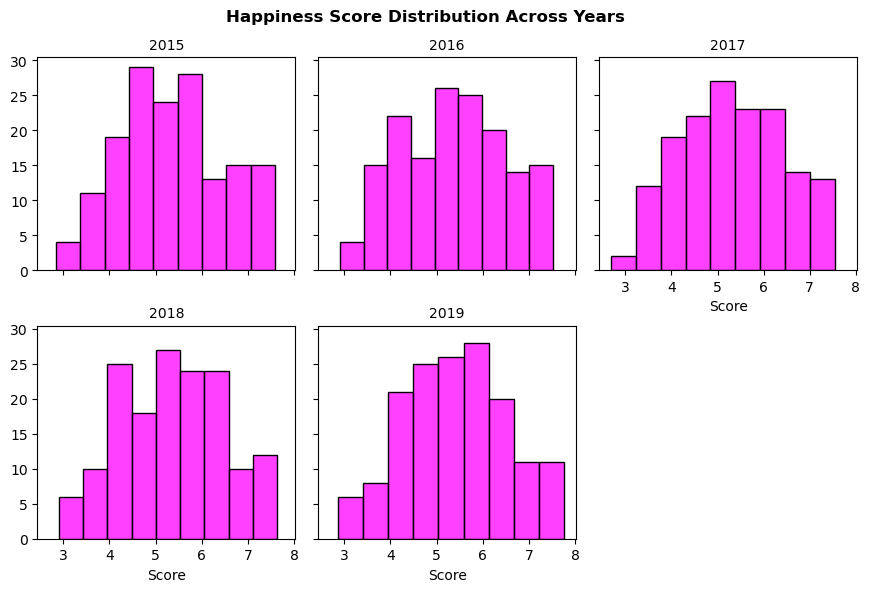

In [46]:
g = sns.FacetGrid(data=df,col="Year",col_wrap=3,despine=False)
g.map(sns.histplot,"Score",color="magenta",common_norm=False)
g.set_titles("{col_name}")
g.set_axis_labels("Score","")
g.fig.suptitle("Happiness Score Distribution Across Years",weight="bold")
g.fig.subplots_adjust(top=0.9)
plt.show()

We can see there's a small shift on the Score distribution from 2018 onwards.

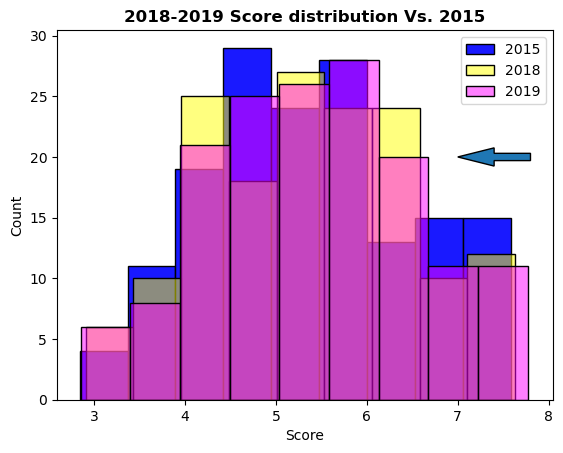

In [47]:
y15 = df[df["Year"]==2015]
y18 = df[df["Year"]==2018]
y19 = df[df["Year"]==2019]
fig, ax = plt.subplots()
sns.histplot(data=y15,x="Score",ax=ax,alpha=0.9,color="blue",label="2015",common_norm=False)
sns.histplot(data=y18,x="Score",ax=ax,alpha=0.5,color="yellow",label="2018",common_norm=False)
sns.histplot(data=y19,x="Score",ax=ax,alpha=0.5,color="magenta",label="2019",common_norm=False)
ax.arrow(x=7.8,y=20,dx=-0.4,dy=0,head_width=1.5,width=0.6,head_length=0.4)
ax.set_title("2018-2019 Score distribution Vs. 2015",weight="bold")
plt.legend()
plt.show()

Here we can see that scores that were previously concentrated in the upper bins are now more spread towards the middle range. This shift suggests two possibilities: either the global score genuinely decreased, or the introduction of the Social Support variable changed how the score is calculated.

## 2. Which variables best explain the score?

I plotted some scatters to see the relation between variables.

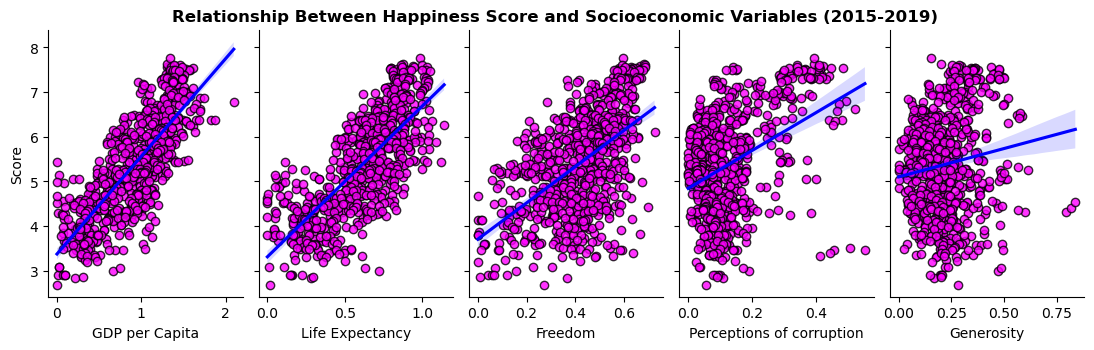

In [48]:
g = sns.PairGrid(df,height=2,aspect=2,y_vars=["Score"],x_vars=["GDP per Capita","Life Expectancy","Freedom","Perceptions of corruption","Generosity"])
g.map(sns.regplot, color="magenta",scatter_kws={"edgecolor":"black"},line_kws={"color":"blue"})
g.fig.set_size_inches(11,4)
g.fig.suptitle("Relationship Between Happiness Score and Socioeconomic Variables (2015-2019)",weight="bold")
plt.show()

We can see most of them have a positive correlation, we'll make a heatmap to see it more in depth.

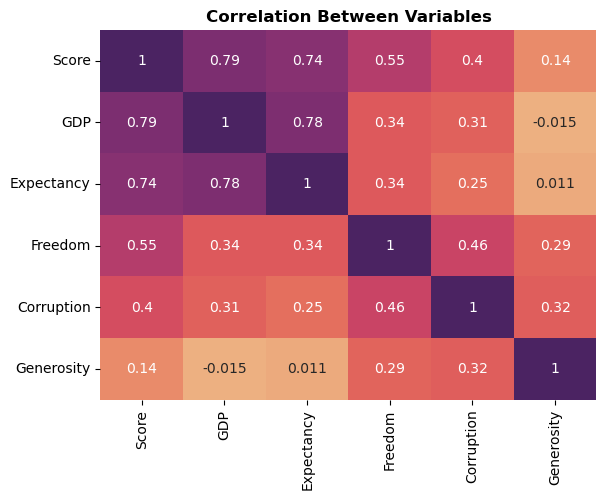

In [49]:
palette = sns.blend_palette(["magenta","dodgerblue"],as_cmap=True)
c = df.drop(columns=["Rank","Year"])
corr = c.corr(numeric_only=True)
g = sns.heatmap(corr,annot=True,cmap="flare", cbar=False)
g.set_yticklabels(["Score","GDP","Expectancy","Freedom","Corruption","Generosity"])
g.set_xticklabels(["Score","GDP","Expectancy","Freedom","Corruption","Generosity"])
g.set_title("Correlation Between Variables",weight="bold")
plt.show()

Here I removed the columns Rank and Year so the heatmap is less redundant, we can see GDP and Expectancy have quite a big correlation to the Happiness Score. Also, other variables like Freedom and Perceptions of corruption don't seem to make a difference on the Happiness Score.

## 3. Which countries fall or rise the most in the rankings over the years?

Next, I evaluate which countries experienced the largest changes in ranking between 2015 and 2019.

In [50]:
pivot = df.pivot(index="Country", columns="Year",values="Rank")
pivot["Rank_change"] = pivot[2019] - pivot[2015]
improved = -pivot.loc[pivot["Rank_change"].nsmallest(10).index]
dropped = -pivot.loc[pivot["Rank_change"].nlargest(10).index]

I first created a pivot with the variables to work on. I defined Rank Change as the rank on 2019 - the rank on 2015, so we can see rank evolution from the first year on the dataset to the last one. A negative value indicates an improvement in rank, so I inverted the sign to make the visualization more intuitive.

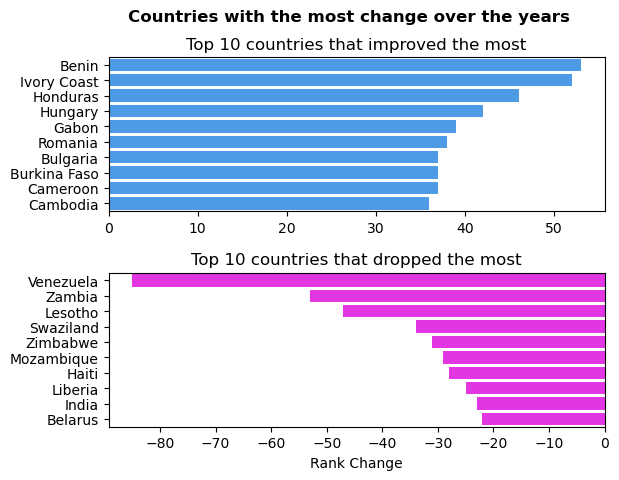

In [51]:
fig, (ax,ax1) = plt.subplots(2,1)
sns.barplot(data=improved,y="Country",x="Rank_change",ax=ax,color="dodgerblue",alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Top 10 countries that improved the most")
sns.barplot(data=dropped,y="Country",x="Rank_change",ax=ax1,color="magenta",alpha=0.9)
ax1.set_title("Top 10 countries that dropped the most")
ax1.set_ylabel("")
ax1.set_xlabel("Rank Change")
fig.suptitle("Countries with the most change over the years",weight="bold")
fig.subplots_adjust(hspace=0.4)
plt.show()

Here we can see Benin was the country with the most improvement through the years. On the other hand, Venezuela was the country that dropped the most.
I plotted their movement through the ranking across the years together with their GDP per Capita evolution.

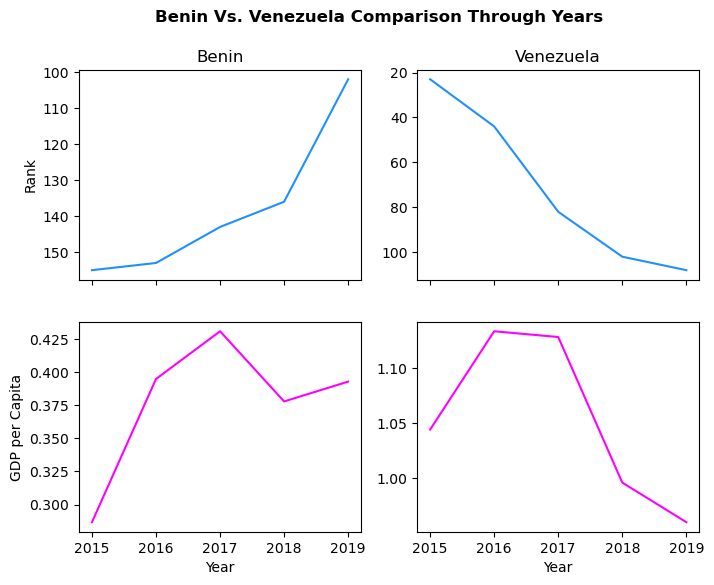

In [52]:
benin = df[df["Country"] == "Benin"]
ven = df[df["Country"] == "Venezuela"]
fig, ax = plt.subplots(2,2,figsize=(8,6),sharex=True)
sns.lineplot(data=benin,x="Year",y="Rank",color="dodgerblue",ax=ax[0,0])
sns.lineplot(data=benin,x="Year",y="GDP per Capita",color="magenta",ax=ax[1,0])
sns.lineplot(data=ven, x ="Year",y="Rank",color="dodgerblue",ax=ax[0,1])
sns.lineplot(data=ven, x="Year",y="GDP per Capita",color="magenta",ax=ax[1,1])
ax[0,0].set_title("Benin")
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")
ax[0,1].set_title("Venezuela")

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
fig.suptitle("Benin Vs. Venezuela Comparison Through Years",weight="bold")
plt.show()

We can see the movement through the ranks is closely related to GDP per Capita. Although one variable alone can't explain the Happiness Score, this results align with our previous results about Score relationship with variables.

## 4. Which countries are consistently the happiest?

I used again the pivot I made for the section before, but I added a Rank Mean to measure consistency and used a barplot to show this.

In [53]:
pivot["Rank_mean"]  = pivot.drop(columns=["Rank_change"]).mean(axis=1)
pivot["std"] = pivot.drop(columns=["Rank_change","Rank_mean"]).std(axis=1)
t10 = pivot.loc[pivot["Rank_mean"].nsmallest(10).index]

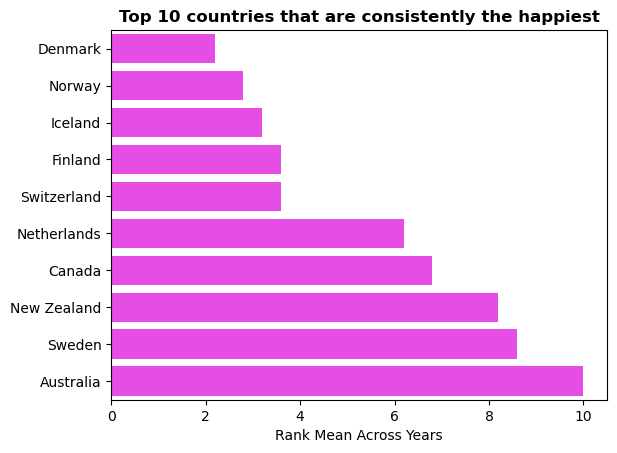

In [54]:
g = sns.barplot(data=t10, y="Country",x="Rank_mean",color="magenta",alpha=0.8)
g.set_ylabel("")
g.set_title("Top 10 countries that are consistently the happiest",weight="bold")
g.set_xlabel("Rank Mean Across Years")
plt.show()

Here we can see these countries were consistently between the top 10 across the whole dataset with Denmark being the happiest through the years.

In [55]:
t10

Year,2015,2016,2017,2018,2019,Rank_change,Rank_mean,std
Country,,,,,,,,
Denmark,3.0,1.0,2.0,3.0,2.0,-1.0,2.2,0.836660
Norway,4.0,4.0,1.0,2.0,3.0,-1.0,2.8,1.303840
Iceland,2.0,3.0,3.0,4.0,4.0,2.0,3.2,0.836660
Finland,6.0,5.0,5.0,1.0,1.0,-5.0,3.6,2.408319
Switzerland,1.0,2.0,4.0,5.0,6.0,5.0,3.6,2.073644
Netherlands,7.0,7.0,6.0,6.0,5.0,-2.0,6.2,0.836660
Canada,5.0,6.0,7.0,7.0,9.0,4.0,6.8,1.483240
New Zealand,9.0,8.0,8.0,8.0,8.0,-1.0,8.2,0.447214
Sweden,8.0,10.0,9.0,9.0,7.0,-1.0,8.6,1.140175


Beyond analysing the average rank, I also calculated the standard deviation for each country.The happiest countries show very low dispersion values, indicating their rank position remained stable over time.

# Conclusion.

The analysis of the World Happiness dataset (2015–2019) reveals several consistent patterns in how different socioeconomic factors relate to overall happiness levels across countries.

First, although the Happiness Score remains relatively stable over the years, a noticeable shift in its distribution occurs after 2018. This can be partially attributed to a change in the dataset’s structure, where a new variable was added in later reports. Even so, the central tendency of the score shows only mild year-to-year variation, suggesting that global happiness levels are fairly stable in the medium term.

The variables most strongly associated with Happiness Score are GDP per Capita and Life Expectancy, both showing a clear positive relationship across all years. This indicates that economic conditions and access to healthcare are foundational drivers of well-being worldwide. We can see this reflected on the countries that moved the most.
Freedom to make life choices also shows a consistent moderate relationship with happiness, reinforcing the idea that individual autonomy contributes meaningfully to perceived quality of life.

In contrast, Perceptions of Corruption displays weak correlation with happiness, although the variable itself shows large variability between countries. This suggests that corruption may influence well-being indirectly or interact with other factors rather than acting as a primary determinant.

When looking at country rankings, Nordic nations — particularly Finland, Denmark, and Norway — appear consistently at the top throughout all five years. Their stable performance highlights how a combination of strong institutions, high income, and robust social systems contributes to long-term well-being.

Overall, the data shows that while happiness is influenced by multiple factors, a small set of structural indicators — especially economic wealth and health — explain most of the differences observed across countries. The stability of top and bottom performers across the five-year period also suggests that improving national happiness requires long-term structural changes rather than short-term policy adjustments.